In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/Tubi-Data.csv'
df = pd.read_csv(file_path)

# Quick preview of data
print("Initial Data Sample:")
print(df.head())
print("\nColumn Info:")
print(df.info())

# Step 1.1 - Clean 'Movie Length' into minutes (convert text to int)
def parse_movie_length(length):
    if pd.isnull(length):
        return np.nan  # Keep NaN for now
    parts = length.split()
    minutes = 0
    if 'hr' in parts:
        hr_index = parts.index('hr')
        minutes += int(parts[hr_index - 1]) * 60
    if 'min' in parts:
        min_index = parts.index('min')
        minutes += int(parts[min_index - 1])
    return minutes

df['Movie Length (Minutes)'] = df['Movie Length'].apply(parse_movie_length)

# Fill missing lengths with median length
df['Movie Length (Minutes)'].fillna(df['Movie Length (Minutes)'].median(), inplace=True)

display(df)


Initial Data Sample:
                     Title                                          Title_URL  \
0                 Farscape  https://tubitv.com/series/300009559/farscape?s...   
1  The Betrayal 2: Revenge  https://tubitv.com/movies/689161/the-betrayal-...   
2           Meet the Snows  https://tubitv.com/movies/698767/meet-the-snow...   
3      Til My Casket Drops  https://tubitv.com/movies/699113/til-my-casket...   
4            McGraw Avenue  https://tubitv.com/series/4893/mcgraw-avenue?s...   

   Release Date Movie Length Movie Rating                          Movie Genre  
0          1999          NaN        TV-14  Sci-Fi · Action · Adventure · Drama  
1          2022  2 hr 14 min        TV-MA               Action · Crime · Drama  
2          2022  1 hr 46 min        TV-MA                       Action · Drama  
3          2022  1 hr 40 min        TV-MA               Crime · Action · Drama  
4          2020          NaN        TV-14                       Drama · Action  

Colum

<ipython-input-1-27adf0f00f27>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Movie Length (Minutes)'].fillna(df['Movie Length (Minutes)'].median(), inplace=True)


,Title,Title_URL,Release Date,Movie Length,Movie Rating,Movie Genre,Movie Length (Minutes)
0,Farscape,https://tubitv.com/series/300009559/farscape?s...,1999,NaN,TV-14,Sci-Fi · Action · Adventure · Drama,93.0
1,The Betrayal 2: Revenge,https://tubitv.com/movies/689161/the-betrayal-...,2022,2 hr 14 min,TV-MA,Action · Crime · Drama,134.0
2,Meet the Snows,https://tubitv.com/movies/698767/meet-the-snow...,2022,1 hr 46 min,TV-MA,Action · Drama,106.0
3,Til My Casket Drops,https://tubitv.com/movies/699113/til-my-casket...,2022,1 hr 40 min,TV-MA,Crime · Action · Drama,100.0
4,McGraw Avenue,https://tubitv.com/series/4893/mcgraw-avenue?s...,2020,NaN,TV-14,Drama · Action,93.0
...,...,...,...,...,...,...,...
297,America's Test Kitchen,https://tubitv.com/series/300005464/america-s-...,2001,NaN,TV-G,Lifestyle · Reality,93.0
298,NatureVision TV,https://tubitv.com/series/1665/naturevision-tv...,2018,NaN,TV-G,Music · Reality · Lifestyle · Documentary,93.0
299,The Johnny Carson Show,https://tubitv.com/series/300004966/the-johnny...,1953,NaN,TV-PG,Comedy · Lifestyle,93.0
300,Jo Frost: Nanny on Tour,https://tubitv.com/series/4057/jo-frost-nanny-...,2016,NaN,TV-PG,Reality · Documentary · Lifestyle,93.0


In [2]:
# Split 'Movie Genre' into separate columns (One-Hot Encoding)
genres = df['Movie Genre'].str.get_dummies('·')
df = pd.concat([df, genres], axis=1)
display(df)

,Title,Title_URL,Release Date,Movie Length,Movie Rating,Movie Genre,Movie Length (Minutes),Action,Action,Adult,...,Sci-Fi,Sci-Fi,Sport,Sport,Thriller,Thriller,War,War,Western,Western
0,Farscape,https://tubitv.com/series/300009559/farscape?s...,1999,NaN,TV-14,Sci-Fi · Action · Adventure · Drama,93.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Betrayal 2: Revenge,https://tubitv.com/movies/689161/the-betrayal-...,2022,2 hr 14 min,TV-MA,Action · Crime · Drama,134.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Meet the Snows,https://tubitv.com/movies/698767/meet-the-snow...,2022,1 hr 46 min,TV-MA,Action · Drama,106.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Til My Casket Drops,https://tubitv.com/movies/699113/til-my-casket...,2022,1 hr 40 min,TV-MA,Crime · Action · Drama,100.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,McGraw Avenue,https://tubitv.com/series/4893/mcgraw-avenue?s...,2020,NaN,TV-14,Drama · Action,93.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,America's Test Kitchen,https://tubitv.com/series/300005464/america-s-...,2001,NaN,TV-G,Lifestyle · Reality,93.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,NatureVision TV,https://tubitv.com/series/1665/naturevision-tv...,2018,NaN,TV-G,Music · Reality · Lifestyle · Documentary,93.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,The Johnny Carson Show,https://tubitv.com/series/300004966/the-johnny...,1953,NaN,TV-PG,Comedy · Lifestyle,93.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300,Jo Frost: Nanny on Tour,https://tubitv.com/series/4057/jo-frost-nanny-...,2016,NaN,TV-PG,Reality · Documentary · Lifestyle,93.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Cleanup column names (remove spaces at ends)
df.columns = df.columns.str.strip()
display(df.columns)

Index(['Title', 'Title_URL', 'Release Date', 'Movie Length', 'Movie Rating',
       'Movie Genre', 'Movie Length (Minutes)', 'Action', 'Action', 'Adult',
       'Adventure', 'Animation', 'Anime', 'Anime', 'Comedy', 'Comedy', 'Crime',
       'Documentary', 'Documentary', 'Drama', 'Drama', 'Foreign/International',
       'Holiday', 'Horror', 'Horror', 'Kids & Family', 'Kids & Family',
       'Lifestyle', 'Lifestyle', 'Music', 'Musicals', 'Music', 'Mystery',
       'Reality', 'Reality', 'Romance', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'Thriller', 'Western', 'Western', 'Action', 'Action',
       'Adult', 'Adult', 'Adventure', 'Adventure', 'Animation', 'Animation',
       'Anime', 'Comedy', 'Comedy', 'Crime', 'Crime', 'Documentary',
       'Documentary', 'Drama', 'Drama', 'Fantasy', 'Fantasy',
       'Foreign/International', 'Foreign/International', 'Holiday', 'Holiday',
       'Horror', 'Horror', 'Independent', 'Independent', 'Kids & Family',
       'Kids & Family', 'LGBT', 'LGB

In [4]:
# Drop unnecessary columns (URL might not be needed for analysis)
df.drop(columns=['Title_URL'], inplace=True)
display(df.drop)

<bound method DataFrame.drop of                                Title  Release Date Movie Length Movie Rating  \
0                           Farscape          1999          NaN        TV-14   
1            The Betrayal 2: Revenge          2022  2 hr 14 min        TV-MA   
2                     Meet the Snows          2022  1 hr 46 min        TV-MA   
3                Til My Casket Drops          2022  1 hr 40 min        TV-MA   
4                      McGraw Avenue          2020          NaN        TV-14   
..                               ...           ...          ...          ...   
297           America's Test Kitchen          2001          NaN         TV-G   
298                  NatureVision TV          2018          NaN         TV-G   
299           The Johnny Carson Show          1953          NaN        TV-PG   
300          Jo Frost: Nanny on Tour          2016          NaN        TV-PG   
301  Roblox Adventures With Flamingo          2019          NaN        TV-PG   

                                   Movie Genre  Movie Length (Minutes)  \
0          Sci-Fi · Action · Adventure · Drama                    93.0   
1                       Action · Crime · Drama                   134.0   
2                               Action · Drama                   106.0   
3                       Crime · Action · Drama                   100.0   
4                               Drama · Action                    93.0   
..                                         ...                     ...   
297                        Lifestyle · Reality                    93.0   
298  Music · Reality · Lifestyle · Documentary                    93.0   
299                         Comedy · Lifestyle                    93.0   
300          Reality · Documentary · Lifestyle                    93.0   
301         Lifestyle · Kids & Family · Comedy                    93.0   

     Action  Action  Adult  Adventure  ...  Sci-Fi  Sci-Fi  Sport  Sport  \
0         0       0      0          0  ...       0       0      0      0   
1         0       1      0          0  ...       0       0      0      0   
2         0       1      0          0  ...       0       0      0      0   
3         0       0      0          0  ...       0       0      0      0   
4         0       0      0          0  ...       0       0      0      0   
..      ...     ...    ...        ...  ...     ...     ...    ...    ...   
297       0       0      0          0  ...       0       0      0      0   
298       0       0      0          0  ...       0       0      0      0   
299       0       0      0          0  ...       0       0      0      0   
300       0       0      0          0  ...       0       0      0      0   
301       0       0      0          0  ...       0       0      0      0   

     Thriller  Thriller  War  War  Western  Western  
0           0         0    0    0        0        0  
1           0         0    0    0        0        0  
2           0         0    0    0        0        0  
3           0         0    0    0        0        0  
4           0         0    0    0        0        0  
..        ...       ...  ...  ...      ...      ...  
297         0         0    0    0        0        0  
298         0         0    0    0        0        0  
299         0         0    0    0        0        0  
300         0         0    0    0        0        0  
301         0         0    0    0        0        0  

[302 rows x 95 columns]>

In [5]:
# Handle missing release dates (fill with placeholder year if needed)
df['Release Date'].fillna(0, inplace=True)
df['Release Date'] = df['Release Date'].astype(int)
display(df)

<ipython-input-5-9170851c0717>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Release Date'].fillna(0, inplace=True)


,Title,Release Date,Movie Length,Movie Rating,Movie Genre,Movie Length (Minutes),Action,Action,Adult,Adventure,...,Sci-Fi,Sci-Fi,Sport,Sport,Thriller,Thriller,War,War,Western,Western
0,Farscape,1999,NaN,TV-14,Sci-Fi · Action · Adventure · Drama,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Betrayal 2: Revenge,2022,2 hr 14 min,TV-MA,Action · Crime · Drama,134.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Meet the Snows,2022,1 hr 46 min,TV-MA,Action · Drama,106.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Til My Casket Drops,2022,1 hr 40 min,TV-MA,Crime · Action · Drama,100.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,McGraw Avenue,2020,NaN,TV-14,Drama · Action,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,America's Test Kitchen,2001,NaN,TV-G,Lifestyle · Reality,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,NatureVision TV,2018,NaN,TV-G,Music · Reality · Lifestyle · Documentary,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,The Johnny Carson Show,1953,NaN,TV-PG,Comedy · Lifestyle,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300,Jo Frost: Nanny on Tour,2016,NaN,TV-PG,Reality · Documentary · Lifestyle,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Summary after cleanup
display("Cleaned Data Sample:")
display(df.head())
display("Summary Statistics:")
display(df.describe(include='all'))

'Cleaned Data Sample:'

,Title,Release Date,Movie Length,Movie Rating,Movie Genre,Movie Length (Minutes),Action,Action,Adult,Adventure,...,Sci-Fi,Sci-Fi,Sport,Sport,Thriller,Thriller,War,War,Western,Western
0,Farscape,1999,NaN,TV-14,Sci-Fi · Action · Adventure · Drama,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Betrayal 2: Revenge,2022,2 hr 14 min,TV-MA,Action · Crime · Drama,134.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Meet the Snows,2022,1 hr 46 min,TV-MA,Action · Drama,106.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Til My Casket Drops,2022,1 hr 40 min,TV-MA,Crime · Action · Drama,100.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,McGraw Avenue,2020,NaN,TV-14,Drama · Action,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'Summary Statistics:'

,Title,Release Date,Movie Length,Movie Rating,Movie Genre,Movie Length (Minutes),Action,Action,Adult,Adventure,...,Sci-Fi,Sci-Fi,Sport,Sport,Thriller,Thriller,War,War,Western,Western
count,302,302.000000,228,302,302,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
unique,302,NaN,80,11,189,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Farscape,NaN,1 hr 30 min,TV-MA,Drama,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,10,86,18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2005.314570,NaN,NaN,NaN,93.788079,0.009934,0.086093,0.003311,0.013245,...,0.019868,0.013245,0.026490,0.013245,0.056291,0.013245,0.006623,0.003311,0.009934,0.003311
std,NaN,20.831001,NaN,NaN,NaN,20.915940,0.099337,0.280966,0.057544,0.114512,...,0.139777,0.114512,0.160854,0.114512,0.230866,0.114512,0.081244,0.057544,0.099337,0.057544
min,NaN,1931.000000,NaN,NaN,NaN,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1998.250000,NaN,NaN,NaN,87.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,2015.000000,NaN,NaN,NaN,93.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,2019.000000,NaN,NaN,NaN,100.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
# Save cleaned dataset for next steps
df.to_csv('Tubi_Cleaned.csv', index=False)

In [8]:
import pandas as pd

# Direct link for downloading the file
file_url = 'https://drive.google.com/uc?id=1i8sjAw1d4pHGwjBTIqQeBKYQ9_q73zai'

# Load the cleaned dataset
df = pd.read_csv(file_url)

# Preview the data
print("Dataset Loaded Successfully!")
display(df.head())


Dataset Loaded Successfully!


,Title,Release Date,Movie Length,Movie Rating,Movie Genre,Movie Length (Minutes),Action,Action.1,Adult,Adventure,...,Sci-Fi.1,Sci-Fi.2,Sport.1,Sport.2,Thriller.2,Thriller.3,War,War.1,Western.2,Western.3
0,Farscape,1999,0,TV-14,Sci-Fi · Action · Adventure · Drama,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Betrayal 2: Revenge,2022,2 hr 14 min,TV-MA,Action · Crime · Drama,134.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Meet the Snows,2022,1 hr 46 min,TV-MA,Action · Drama,106.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Til My Casket Drops,2022,1 hr 40 min,TV-MA,Crime · Action · Drama,100.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,McGraw Avenue,2020,0,TV-14,Drama · Action,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Data Analysis
# Average Movie Length
average_length = df['Movie Length (Minutes)'].mean()
print(f"Average Movie Length: {average_length:.2f} minutes")

Average Movie Length: 93.79 minutes


In [10]:
# Genre Frequency Distribution
all_genres = df['Movie Genre'].str.split('·').explode()
genre_distribution = all_genres.value_counts()
print("\nGenre Frequency Distribution:")
print(genre_distribution)


Genre Frequency Distribution:
Movie Genre
Drama                     46
Comedy                    44
 Foreign/International    35
Action                    26
 Drama                    22
                          ..
 Musicals                  1
 Anime                     1
Romance                    1
Holiday                    1
 Documentary               1
Name: count, Length: 89, dtype: int64


In [11]:
# Rating Distribution
rating_distribution = df['Movie Rating'].value_counts()
print("\nRating Distribution:")
print(rating_distribution)


Rating Distribution:
Movie Rating
TV-MA       86
TV-14       67
TV-PG       56
TV-G        28
R           25
PG          16
PG-13       11
TV-Y         8
G            2
TV-Y7_FV     2
TV-Y7        1
Name: count, dtype: int64


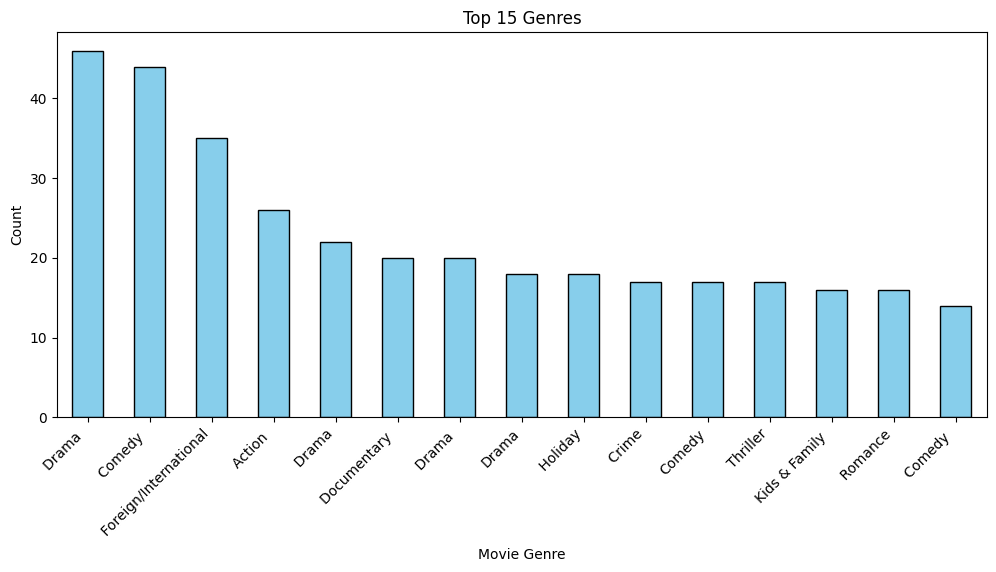

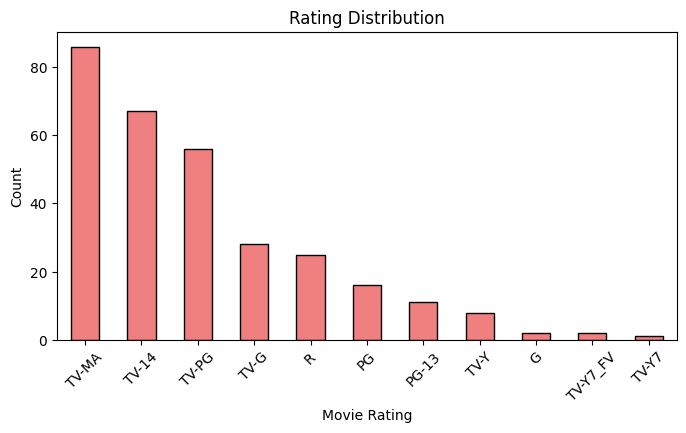

In [12]:
# Visualizations
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
genre_distribution.head(15).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 15 Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(8,4))
rating_distribution.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Rating Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Define Persona Criteria

def assign_persona(row):
    genres = row['Movie Genre'].split('·')
    length = row['Movie Length (Minutes)']
    rating = row['Movie Rating']

    if length > 90 and ('Drama' in genres or 'Crime' in genres):
        return 'Binge Watcher'
    elif length <= 60 and ('Comedy' in genres or 'Lifestyle' in genres):
        return 'Casual Viewer'
    elif len(set(genres)) == 1:
        return 'Genre Enthusiast'
    elif rating in ['TV-G', 'TV-PG'] and length < 90:
        return 'Family Viewer'
    else:
        return 'Other'

df['Persona'] = df.apply(assign_persona, axis=1)
display(df)

,Title,Release Date,Movie Length,Movie Rating,Movie Genre,Movie Length (Minutes),Action,Action.1,Adult,Adventure,...,Sci-Fi.2,Sport.1,Sport.2,Thriller.2,Thriller.3,War,War.1,Western.2,Western.3,Persona
0,Farscape,1999,0,TV-14,Sci-Fi · Action · Adventure · Drama,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
1,The Betrayal 2: Revenge,2022,2 hr 14 min,TV-MA,Action · Crime · Drama,134.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Other
2,Meet the Snows,2022,1 hr 46 min,TV-MA,Action · Drama,106.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Other
3,Til My Casket Drops,2022,1 hr 40 min,TV-MA,Crime · Action · Drama,100.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
4,McGraw Avenue,2020,0,TV-14,Drama · Action,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,America's Test Kitchen,2001,0,TV-G,Lifestyle · Reality,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
298,NatureVision TV,2018,0,TV-G,Music · Reality · Lifestyle · Documentary,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
299,The Johnny Carson Show,1953,0,TV-PG,Comedy · Lifestyle,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
300,Jo Frost: Nanny on Tour,2016,0,TV-PG,Reality · Documentary · Lifestyle,93.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv('Tubi_Cleaned.csv')

# Data Cleanup
def parse_movie_length(length):
    if pd.isnull(length):
        return np.nan
    parts = length.split()
    minutes = 0
    if 'hr' in parts:
        hr_index = parts.index('hr')
        minutes += int(parts[hr_index - 1]) * 60
    if 'min' in parts:
        min_index = parts.index('min')
        minutes += int(parts[min_index - 1])
    return minutes

df['Movie Length (Minutes)'] = df['Movie Length'].apply(parse_movie_length)
df['Movie Length (Minutes)'].fillna(df['Movie Length (Minutes)'].median(), inplace=True)
df['Release Date'].fillna(0, inplace=True)

# Genre One-Hot Encoding
genre_df = df['Movie Genre'].str.get_dummies('·')
df = pd.concat([df, genre_df], axis=1)

# Feature Engineering for Clustering
df['Release Date'] = df['Release Date'].astype(float)

features = ['Movie Length (Minutes)', 'Release Date']
features.extend(genre_df.columns.tolist())

scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# K-Means Clustering
# Opting to use K-Means Clustering for User Personas
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Map Clusters to User Personas
cluster_names = {
    0: "Family Friendly",
    1: "Action Junkies",
    2: "Drama Lovers",
    3: "Nostalgia Fans",
    4: "Documentary Seekers"
}
df['Persona'] = df['Cluster'].map(cluster_names)

# Content-Based Recommendation System
def recommend_movies(selected_title, top_n=5):
    selected_movie = df[df['Title'].str.lower() == selected_title.lower()]
    if selected_movie.empty:
        return []

    genre_columns = genre_df.columns.tolist()
    selected_vector = selected_movie[genre_columns + ['Movie Length (Minutes)', 'Release Date']].values
    all_vectors = df[genre_columns + ['Movie Length (Minutes)', 'Release Date']].values

    similarities = cosine_similarity(selected_vector, all_vectors)[0]
    df['Similarity'] = similarities

    recommendations = df.sort_values(by='Similarity', ascending=False).head(top_n + 1)
    recommendations = recommendations[recommendations['Title'].str.lower() != selected_title.lower()]
    return recommendations[['Title', 'Movie Genre', 'Movie Length (Minutes)', 'Release Date', 'Similarity']]

# Test Recommendation System
print("Sample Recommendations for 'Farscape':")
print(recommend_movies('Farscape'))

# Final Save
df.to_csv('Tubi_with_Personas_and_Clusters.csv', index=False)
print("Data Processed and Saved!")


<ipython-input-16-ff295f6e1ae1>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Movie Length (Minutes)'].fillna(df['Movie Length (Minutes)'].median(), inplace=True)
<ipython-input-16-ff295f6e1ae1>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

Sample Recommendations for 'Farscape':
                                   Title               Movie Genre  \
270                           Land's End    Crime · Action · Drama   
150                       Lockdown: 2025         Sci-Fi · Thriller   
106    Gang of Roses II: Next Generation  Western · Action · Drama   
60                       Unfair Exchange  Thriller · Crime · Drama   
76   A Flash of Beauty: Bigfoot Revealed               Documentary   

     Movie Length (Minutes)  Release Date  Similarity  
270                    93.0        1995.0    1.000000  
150                    93.0        2021.0    0.999999  
106                    92.0        2013.0    0.999999  
60                     95.0        2022.0    0.999999  
76                     94.0        2021.0    0.999999  
Data Processed and Saved!


In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv('Tubi_with_Personas_and_Clusters.csv')

# Combine relevant features into a single text feature (this can be adjusted if needed)
df['Combined_Features'] = df.apply(lambda row: f"{row['Movie Genre']} {row['Movie Rating']} {row['Movie Length (Minutes)']}", axis=1)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Combined_Features'])

# Compute cosine similarity across all movies
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Persona Boosting Weight
PERSONA_BOOST = 0.2  # This weight can be tuned if needed

# Movie title lookup
title_to_index = pd.Series(df.index, index=df['Title']).to_dict()

# Hybrid Recommendation Function (Cosine Similarity + Persona Bonus)
def recommend_movies_with_persona_boost(movie_title, top_n=10):
    if movie_title not in title_to_index:
        print(f"Movie '{movie_title}' not found in dataset.")
        return []

    idx = title_to_index[movie_title]
    target_persona = df.iloc[idx]['Persona']

    # Compute similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Apply persona bonus to same-persona movies
    boosted_scores = []
    for i, score in sim_scores:
        if i == idx:
            continue  # Skip self
        persona_bonus = PERSONA_BOOST if df.iloc[i]['Persona'] == target_persona else 0
        boosted_score = score + persona_bonus
        boosted_scores.append((i, boosted_score))

    # Sort by boosted score
    boosted_scores = sorted(boosted_scores, key=lambda x: x[1], reverse=True)

    # Get top N recommendations
    top_recommendations = [df.iloc[i]['Title'] for i, score in boosted_scores[:top_n]]

    return top_recommendations

# Replace with any movie you want to test
movie = "Farscape"
recommended_movies = recommend_movies_with_persona_boost(movie)

print(f"\nTop Recommendations for '{movie}' (Hybrid with Persona Boost):")
for idx, rec in enumerate(recommended_movies, start=1):
    print(f"{idx}. {rec}")


Top Recommendations for 'Farscape' (Hybrid with Persona Boost):
1. Femalien: Cosmic Crush
2. Escape 2120
3. Lockdown: 2025
4. Saint Seiya Saintia Sho (Sub Esp)
5. Mi Prima Ciela
6. The Thaw
7. Archons
8. Giantess Battle Attack!
9. Tammy and the T-Rex
10. Puppetmaster
